<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER5%20%EB%AA%A8%EB%8D%B8%20%ED%8F%89%EA%B0%80%EC%99%80%20%EC%84%B1%EB%8A%A5%20%ED%96%A5%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 들어가며

지도 학습 모델을 평가하고자 `train_test_split` 함수를 사용해서 두 세트로 나눴습니다. 그리고 모델을 만들기 위해 훈련 세트에 `fit` 메서드를 적용했습니다. 모델을 평가하기 위해 테스트 세트에 `score` 메서드를 사용했습니다. 분류 문제의 경우에 `score` 메서드는 정확하게 분류된 샘플의 비율을 계산합니다.

In [1]:
pip install mglearn

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=74d4d67fb189f489d67d9ff3e4b1762ae63b6582e054fd4426251d4ef3b398ee
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수: {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


익숙한 코드 형식입니다. 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정할 목적으로 데이터를 훈련 세트와 테스트 세트로 나눕니다. 모델이 훈련 세트에 잘 맞는 것보다 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요합니다. 무엇보다도 과대적합과 과소적합을 방지하면서 균형점을 지진 최적의 모델을 형성해야 합니다.

이번 챕터에서는 두 가지 관점에서 이 평가 방법을 확장합니다. 먼저 안정적인 일반화 성능 측정 방법인 '교차 검증'에 대해 설명합니다. `score` 메서도가 제공하는 정확도와 $R^2$ 값 이외에 분류와 회귀 성능을 측정하는 다른 방법도 설명합니다. 아울러 최적의 일반화 성능을 얻을 목적으로 매개변수를 조정하는 데 유용한 '그리드 서치'에 대해서도 설명합니다.

# 5.1 교차 검증

'교차 검증(cross-validation)'은 훈련 세트와 테스트 세트로 한 번 나눈 것보다 더 안정적이고 뛰어난 통계적 방법입니다. 교차 검증에서는 데이터를 여러 번 반복해서 나누고 여러 모델을 학습합니다.

가장 많이 사용되는 방법은 'k-겹 교차 검증(k-fold cross-validation)'입니다. k는 특정 숫자이며, 일반적으로 5나 10입니다. 5-겹 교차 검증을 하려면 데이터를 먼저 폴드(fold)라고 하는 거의 비슷한 크기의 부분 집합 다섯 개로 나눕니다. 그리고나서 일련의 모델을 생성합니다.

첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고, 나머지 폴드를 훈련 세트로 사용해서 학습합니다. 즉 폴드 2~5까지의 데이터로 모델을 만들고, 폴드 1을 사용해서 정확도를 평가합니다. 

두 번째 모델은 두 번째 폴드를 테스트 세트로 사용하고, 나머지 폴드를 훈련 세트로 사용해서 학습합니다. 즉 폴드 1과 3~5까지의 데이터로 모델을 만들고, 폴드 2를 사용해서 정확도를 평가합니다.

이 방식으로 5까지 반복합니다. 분할을 다섯 번만큼 시도하면서 정확도를 측정하면 정확도 다섯 개를 얻습니다.

위 설명을 그림으로 나타냅니다.

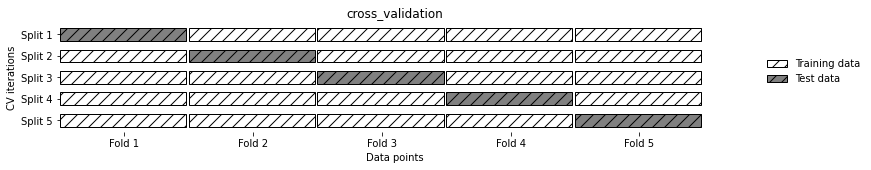

In [4]:
mglearn.plots.plot_cross_validation()

## 5.1.1 scikit-learn의 교차 검증

교차 검증은 `model_selection` 모듈의 `cross_val_score` 함수로 구현되어 있습니다. `cross_val_score` 함수가 가진 매개변수는 평가하려는 모델과 훈련 데이터, 타깃 레이블입니다.

iris 데이터셋에 적용한 `LogisticRegression`을 평가합니다.

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris.data, iris.target)
print('5-겹 교차 검증 점수:', scores)

5-겹 교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


5-겹(기본값) 교차 검증을 수행했으므로 점수 5개가 반환됐습니다.

폴드 수는 `cv` 매개변수로 지정할 수 있습니다. 10-겹 교차 검증을 수행합니다.

In [9]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print('10-겹 교차 검증 점수:', scores)

10-겹 교차 검증 점수: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


최소한 5-겹 교차 검증 정도를 사용하는 편이 좋습니다. 일반적으로 교차 검증의 정확도를 간단하게 나타내려면 평균을 이용합니다.

In [10]:
print('10- 겹 교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

10- 겹 교차 검증 평균 점수: 0.97


모델 정확도를 97%로 판단할 수 있습니다. 10-겹 교차 검증이 만든 값 열 개를 보면 93~100%까지 각각 다른 값을 가집니다. 이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문입니다. 

교차 검증에 `cross_validate` 함수도 사용할 수 있습니다. 이 함수는 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환합니다. 훈련 점수와 테스트 점수 모두 반환하도록 매개변수를 지정할 수도 있습니다. 기실 `cross_validate_score` 함수는 `cross_validate` 함수를 사용해서 `test_score` 키만 반환하는 것입니다.

In [14]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.03326583, 0.03757858, 0.02874756, 0.02997684, 0.03095603]),
 'score_time': array([0.0004518 , 0.00043011, 0.00047112, 0.00042772, 0.00041413]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

판다스를 사용해서 결괏값을 출력하고 평균을 계산합니다.

In [17]:
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수:\n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.033266,0.000452,0.966667,0.966667
1,0.037579,0.000430,1.000000,0.966667
2,0.028748,0.000471,0.933333,0.983333
3,0.029977,0.000428,0.966667,0.983333
4,0.030956,0.000414,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.032105
score_time     0.000439
test_score     0.973333
train_score    0.975000
dtype: float64


### NOTE

교차 검증은 새로운 데이터에 적용할 모델을 만드는 방법이 아닙니다. 교차 검증 함수는 결코 모델을 반환하지 않습니다. `cross_val_score` 함수를 호출하면 내부적으로 여러 모델이 만들어질 뿐입니다. 교차 검증의 목적은 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 가늠하는 것입니다.

교차 검증으로 모델을 만들 수는 없지만 `cross_val_predict` 함수를 사용해서 예측값을 구할 수 있습니다. `cross_val_predict(logreg, iris.data, iris.target, cv=5)` 형식을 취하면 각 폴드가 테스트 세트일 때 예측된 값을 반환합니다.

## 5.1.2 교차 검증의 장점과 단점

교차 검증에는 몇 가지 장점이 있습니다.

먼저 `train_test_split` 함수로 데이터를 나눌 때, 훈련 세트에 분류하기 어려운 샘플만 담기게 되었다고 가정하겠습니다. 이 경우에 테스트 세트에는 분류하기 쉬운 샘플만 들어 있어서 테스트 세트에 대한 정확도는 비정상적으로 높게 나올 것입니다. 반대로 분류하기 어려운 샘플들이 모두 테스트 세트에 들어간다면 정확도는 매우 낮게 나올 것입니다.

그러나 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어갑니다. 각 샘플은 폴드 중 하나에 속하며, 각 폴드는 한 번씩 테스트 세트가 됩니다. 따라서 교차 검증의 점수와 평균값을 높이기 위해서는 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화되어야 합니다.

또 데이터를 여러 개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 확인할 수 있습니다. iris 데이터셋에서 얻은 90~100% 정확도 범위는 꽤 넓으며, 새로운 데이터를 적용했을 때 최악의 경우와 최선의 경우를 짐작할 수 있습니다.

아울러 교차 검증은 분할을 한 번 했을 경우보다 데이터를 효과적으로 사용할 수 있다는 것입니다. `train_test_split` 함수를 사용하면 일반적으로 데이터 중에 75%를 학습에 사용하고, 25%를 평가에 사용합니다. 예컨대 5-겹 교차 검증의 경우는 매 반복에서 4/5(80%)의 데이터를 학습에 사용합니다. 10겹 교차 검증의 경우는 매 반복에서 9/10(90%)의 데이터를 학습에 사용합니다. 많은 데이터는 더 좋은 모델을 만듭니다.

다만 교차 검증에는 단점이 한 가지 존재합니다.

모델을 k개만큼 생성하므로 연산 비용이 크게 늘어납니다. k배만큼 느려진다고 볼 수 있습니다.

## 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지만은 않습니다. iris 데이터셋으로 예를 듭니다.

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
print('Iris 레이블:\n', iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 교차 검증 상세 옵션

### LOOCV

### 임의 분할 교차 검증

### 그룹별 교차 검증

## 5.1.4 반복 교차 검증

# 5.2 그리드 서치

## 5.2.1 간단한 그리드 서치

## 5.2.2 매개변수 과대적합과 검증 세트

## 5.2.3 교차 검증을 사용한 그리드 서치

### 교차 검증 결과 분석

### 비대칭 매개변수 그리드 탐색

### 그리드 서치에 다양한 교차 검증 적용

### 중첩 교차 검증

### 교차 검증과 그리드 서치 병렬화

# 5.2 평가 지표와 측정

## 5.3.1 최종 목표를 기억하라

## 5.3.2 이진 분류의 평가 지표

### 에러의 종류

### 불균형 데이터셋

### 오차 행렬

#### 정확도와의 관계

#### 정밀도, 재현율, f-점수

### 불확실성 고려

### 정밀도-재현율 곡선과 ROC 곡선

### ROC와 AUC

## 5.3.3 다중 분류의 평가 지표

## 5.3.4 회귀의 평가 지표

## 5.3.5 모델 선택에서 평가 지표 사용하기

# 5.4 요약 및 정리